In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json
import os

In [2]:
f = open('/home/eilia/calibration_project/output/data_preprocessing_bpes/cal_metrics_bpe.json')

data = json.load(f)

f.close()

In [3]:
data.keys()

dict_keys(['ECE_human_maj_truth', 'TVD_per_instance', 'KL_Divergenece_per_instance', 'Entropy_difference_per_instance'])

In [4]:
data['ECE_human_maj_truth']

{'model_human': 0.14131043315735123,
 'oracle_dis_1_human': 0.500409376362819,
 'oracle_dis_2_human': 0.3957682820830729,
 'oracle_boot_1_human': 0.14452921395624355,
 'oracle_boot_2_human': 0.5571269064942035}

### Total Variation Distance

In [8]:
data['TVD_per_instance'].keys()

dict_keys(['tvd_model_human', 'tvd_oracle_dis_1_human', 'tvd_oracle_dis_2_human', 'tvd_oracle_boot_1_human', 'tvd_oracle_boot_2_human'])

In [5]:
def get_metrics(list_metric):
    array_metric = np.array(list_metric)
    return np.mean(array_metric), np.std(array_metric), np.min(array_metric), np.max(array_metric)

In [6]:
print('TVD metrics (mean, st. dev., min, max)')
print('Model', get_metrics(data['TVD_per_instance']['tvd_model_human']))
print('Oracles (disjoint)', get_metrics(data['TVD_per_instance']['tvd_oracle_dis_1_human']), get_metrics(data['TVD_per_instance']['tvd_oracle_dis_2_human']))
print('Oracles (bootstrapped)', get_metrics(data['TVD_per_instance']['tvd_oracle_boot_1_human']),  get_metrics(data['TVD_per_instance']['tvd_oracle_boot_2_human']))

TVD metrics (mean, st. dev., min, max)
Model (0.6569717972437811, 0.21796164580740215, 0.0022540665231645107, 0.9999948740005493)
Oracles (disjoint) (0.20733860837157703, 0.09231948302897017, 0.0, 0.5128205418586731) (0.21156800632646836, 0.09469838728744055, 0.0, 0.5)
Oracles (bootstrapped) (0.3310991754116935, 0.13596601634204508, 0.0, 0.6500000357627869) (0.26708852749208356, 0.12936689036209612, 0.0, 0.5928571820259094)


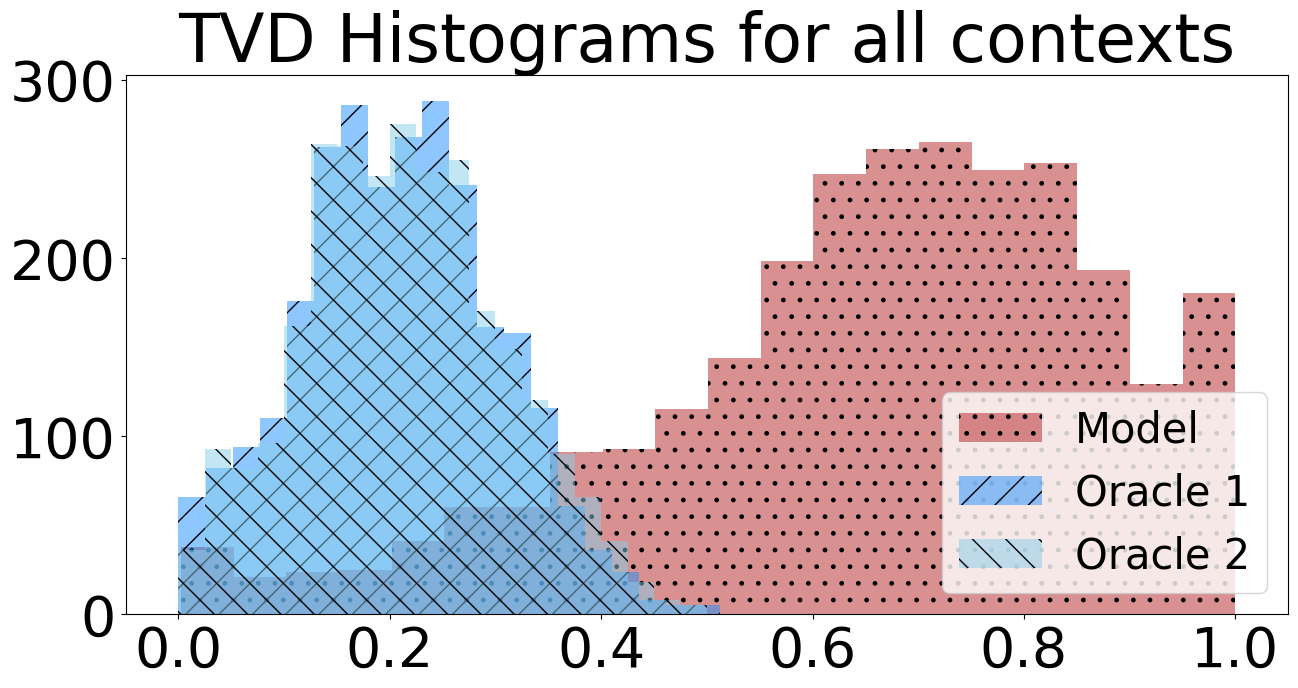

In [11]:
plt.rc('font', size=40)# controls default text sizes
plt.subplots(figsize=(15, 7))

plt.hist(data['TVD_per_instance']['tvd_model_human'], bins=20, alpha=0.5, label='Model', color='firebrick', hatch='.')
plt.hist(data['TVD_per_instance']['tvd_oracle_dis_1_human'], bins=20, alpha=0.5, label='Oracle 1', color='dodgerblue', hatch='/')
plt.hist(data['TVD_per_instance']['tvd_oracle_dis_2_human'], bins=20, alpha=0.5, label='Oracle 2', color='Skyblue', hatch='\\')

plt.title("TVD Histograms for all contexts")
plt.legend(loc='lower right',  prop={'size': 30})

plt.savefig('model_oracles_TVDs_BPES.pdf', format="pdf",bbox_inches='tight')
plt.show()

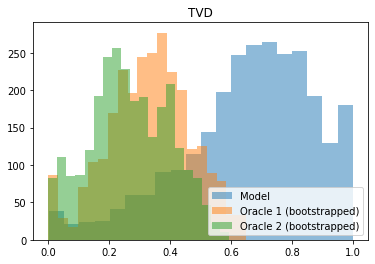

In [17]:
plt.hist(data['TVD_per_instance']['tvd_model_human'], bins=20, alpha=0.5, label='Model')
plt.hist(data['TVD_per_instance']['tvd_oracle_boot_1_human'], bins=20, alpha=0.5, label='Oracle 1 (bootstrapped)')
plt.hist(data['TVD_per_instance']['tvd_oracle_boot_2_human'], bins=20, alpha=0.5, label='Oracle 2 (bootstrapped)')

plt.title("TVD")
plt.legend(loc='lower right')
plt.show()

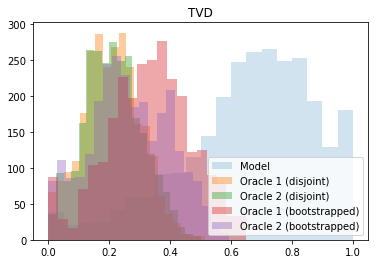

In [19]:
plt.hist(data['TVD_per_instance']['tvd_model_human'], bins=20, alpha=0.2, label='Model')

plt.hist(data['TVD_per_instance']['tvd_oracle_dis_1_human'], bins=20, alpha=0.4, label='Oracle 1 (disjoint)')
plt.hist(data['TVD_per_instance']['tvd_oracle_dis_2_human'], bins=20, alpha=0.4, label='Oracle 2 (disjoint)')
plt.hist(data['TVD_per_instance']['tvd_oracle_boot_1_human'], bins=20, alpha=0.4, label='Oracle 1 (bootstrapped)')
plt.hist(data['TVD_per_instance']['tvd_oracle_boot_2_human'], bins=20, alpha=0.4, label='Oracle 2 (bootstrapped)')

plt.title("TVD")
plt.legend(loc='lower right')
plt.show()

### KL-Divergence

In [22]:
print('KL-Divergenece metrics (mean, st. dev., min, max)')
print('Model', data_model['KL-Divergenece_biased_mean_std_min_max'])

KL-Divergenece metrics (mean, st. dev., min, max)
Model [2.3293120382063366, 2.0405160097700614, 0.0009165432877024114, 20.396115605330415]


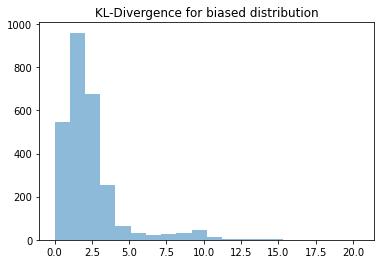

In [23]:
plt.hist(data_model['KL-Divergenece_biased_per_instance'], bins=20, alpha=0.5)
plt.title("KL-Divergence for biased distribution")

plt.show()

#### Entropy Difference

In [22]:
data['Entropy_difference_per_instance'].keys()

dict_keys(['ent_diff_model_human', 'ent_diff_oracle_dis_1_human', 'ent_diff_oracle_dis_2_human', 'ent_diff_oracle_boot_1_human', 'ent_diff_oracle_boot_2_human'])

In [24]:
print('Entropy difference metrics (mean, st. dev., min, max)')
print('Model', get_metrics(data['Entropy_difference_per_instance']['ent_diff_model_human']))
print('Oracles (sampling with repl.)', get_metrics(data['Entropy_difference_per_instance']['ent_diff_oracle_dis_1_human']),  get_metrics(data['Entropy_difference_per_instance']['ent_diff_oracle_dis_2_human']))
print('Oracles (sampling without repl.)',  get_metrics(data['Entropy_difference_per_instance']['ent_diff_oracle_boot_1_human']), get_metrics(data['Entropy_difference_per_instance']['ent_diff_oracle_boot_2_human']))

Entropy difference metrics (mean, st. dev., min, max)
Model (2.0856499626461704, 1.205474282974732, 0.0029396414756774902, 7.107311248779297)
Oracles (sampling with repl.) (0.1970082688418116, 0.13625878533843155, 0.0, 0.6667659282684326) (0.2951849409038354, 0.15574940847679442, 0.0, 0.7561414837837219)
Oracles (sampling without repl.) (0.21608729267879007, 0.20045841678508208, 0.0, 0.9619107246398926) (0.3058224677385164, 0.2343158013443061, 0.0, 1.1005406379699707)


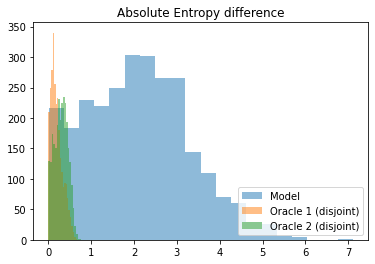

In [25]:
plt.hist(data['Entropy_difference_per_instance']['ent_diff_model_human'], bins=20, alpha=0.5, label='Model')
plt.hist(data['Entropy_difference_per_instance']['ent_diff_oracle_dis_1_human'], bins=20, alpha=0.5, label='Oracle 1 (disjoint)')
plt.hist(data['Entropy_difference_per_instance']['ent_diff_oracle_dis_2_human'], bins=20, alpha=0.5, label='Oracle 2 (disjoint)')

plt.title("Absolute Entropy difference")
plt.legend(loc='lower right')
plt.show()

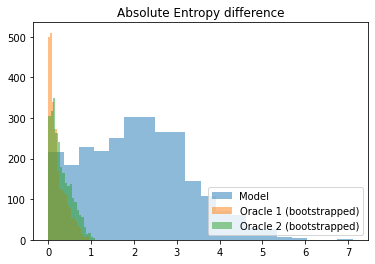

In [26]:
plt.hist(data['Entropy_difference_per_instance']['ent_diff_model_human'], bins=20, alpha=0.5, label='Model')
plt.hist(data['Entropy_difference_per_instance']['ent_diff_oracle_boot_1_human'], bins=20, alpha=0.5, label='Oracle 1 (bootstrapped)')
plt.hist(data['Entropy_difference_per_instance']['ent_diff_oracle_boot_2_human'], bins=20, alpha=0.5, label='Oracle 2 (bootstrapped)')

plt.title("Absolute Entropy difference")
plt.legend(loc='lower right')
plt.show()

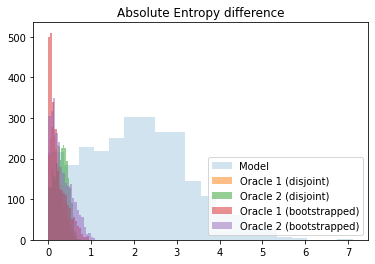

In [27]:
plt.hist(data['Entropy_difference_per_instance']['ent_diff_model_human'], bins=20, alpha=0.2, label='Model')

plt.hist(data['Entropy_difference_per_instance']['ent_diff_oracle_dis_1_human'], bins=20, alpha=0.5, label='Oracle 1 (disjoint)')
plt.hist(data['Entropy_difference_per_instance']['ent_diff_oracle_dis_2_human'], bins=20, alpha=0.5, label='Oracle 2 (disjoint)')

plt.hist(data['Entropy_difference_per_instance']['ent_diff_oracle_boot_1_human'], bins=20, alpha=0.5, label='Oracle 1 (bootstrapped)')
plt.hist(data['Entropy_difference_per_instance']['ent_diff_oracle_boot_2_human'], bins=20, alpha=0.5, label='Oracle 2 (bootstrapped)')

plt.title("Absolute Entropy difference")
plt.legend(loc='lower right')
plt.show()